In [1]:
import sys
home = '/home/nina/CopulaGP/'
sys.path.insert(0, home)

import pickle as pkl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open(f"{home}/results/HYgX_C.pkl","rb") as f:
    data = pkl.load(f)

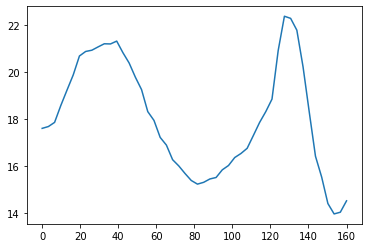

In [3]:
plt.plot(data[0]*160,-data[1])

In [15]:
with open(f"{home}/results/singleH.pkl","rb") as f: #single variable BI_KSG:(MI,H(Y|X)) from standard data
    singleH = pkl.load(f)
# with open(f"{home}/results/Hrs_and_Hr_top.pkl","rb") as f: # top layers of C-Vine
#     (Hrs,Hr) = pkl.load(f)

In [20]:
import MI
from train import conf
import utils
import torch
import tqdm
animal = 'ST260'
day_name = 'Day1'
exp_pref = f'{animal}_{day_name}'

X,Y = utils.standard_loader(f"{conf.path2data}/{exp_pref}_unconditional.pkl")

In [38]:
device = "cuda:1"




  5%|▌         | 1/19 [00:45<13:38, 45.48s/it]

[0.9738142682927658]



100%|██████████| 19/19 [12:28<00:00, 39.40s/it]


In [36]:
singleH = np.empty((Y.shape[-1]))
for i in range(Y.shape[-1]):
    singleH[i] = MI.train_MINE(Y[...,i].reshape((*X.shape,1)),x=torch.tensor(X).float(),
                               H=100,lr=0.01,device=device).item()/np.log(2)
    print(singleH[i])

0.18685029305592216
0.26089333879694643
0.2968146671520578
0.2535365659279762
0.46832307585511224
0.157953735811206
0.42874789009109504
0.37342309210467717
0.08651870485581728
0.11251310323734409
0.39912736112865627
0.45776531889262073
0.25314788513702624
0.0773883931465714
0.3312312118056137
0.16880665799824082
0.18582306218014996
0.2432750275837645
0.36846177958824955
0.6557745342671254
0.19639782392724553
0.11534106771005964
0.9850234095454002
0.26995946873067345
0.8980475694291318
0.10010207197807061
0.06228857974925092
0.08385044239780136
0.24829143904196227
0.22523522988898056
0.09426923737839574
0.12252228928816165
0.8458381081761055
0.04083016735242338
0.1308145295397531
0.15616599765331848
0.13951298206376678
0.2036468496654502
0.027139440060368947
0.3614319027429068
0.0876015721191436
0.46858238269695063
0.06084301719862846
0.18174371969300956
0.10119120585923774
0.07254579165490185
0.37147925819330024
0.09714455082467696
0.12014379072456037
0.07569689540521511
0.173426574203

In [37]:
with open(f"{home}/results/singleMI.pkl","wb") as f: #single variable MINE MI from unconditional data
    pkl.dump(singleH,f)